# Introductory applied machine learning (INFR10069)

<font color='red'>
Q1:	46	  
Q2: 	39	  
Total:	85	  




# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [37]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [38]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
auto_numeric.shape

(159, 16)

<font color='red'>
Good!



### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [39]:
# Your code goes here
auto_numeric.head(8)

normalized-losses  wheel-base  length  width  height  engine-size  bore  \
0              164.0        99.8   176.6   66.2    54.3         8.85  3.19   
1              110.0        99.4   162.4   66.4    54.3        15.18  3.19   
2              158.0       105.8   192.7   71.4    51.6        15.18  3.94   
3              106.0        86.6   158.7   67.7    55.9        13.74  3.13   
4              192.0       101.2   176.8   64.8    54.3         8.67  3.50   
5              194.0       110.0   190.9   71.4    58.7         8.67  3.78   
6              188.0       101.2   176.8   64.8    54.3        26.58  3.31   
7              150.0       101.2   176.8   64.8    56.1        26.58  3.03   

   stroke  compression-ratio  engine-power  peak-rpm  city-mpg  highway-mpg  \
0    3.40               10.0      102000.0    5500.0      24.0         30.0   
1    3.40                8.0      115000.0    5500.0      18.0         22.0   
2    2.80                8.5       70000.0    4400.0      28.0         30.0   
3    3.50                7.8      140000.0    5600.0      32.0         20.0   
4    2.80                8.8      101000.0    5800.0      23.0         29.0   
5    3.90               22.5      101000.0    6000.0      47.0         53.0   
6    3.19                9.0      121000.0    4250.0      21.0         28.0   
7    3.19                8.0      134000.0    4400.0      28.0         37.0   

   mean-effective-pressure   torque    price  
0                    40.52    57.68  13950.0  
1                    47.39    59.59  17450.0  
2                     0.85  3344.79  17710.0  
3                    44.74    68.97  23875.0  
4                    44.78    53.48  16430.0  
5                     1.80  1330.28  16925.0  
6                     7.19   377.06  20970.0  
7                    57.37    48.20  21105.0

<font color='red'>
Good!



### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [40]:
# Your code goes here
auto_numeric.describe()

normalized-losses  wheel-base      length       width      height  \
count         159.000000  159.000000  159.000000  159.000000  159.000000   
mean          121.955975   98.559748  171.698113   65.729560   53.925157   
std            39.434186    5.803361   12.656791    2.292021    2.410446   
min            65.000000   86.600000  141.100000   60.300000   49.400000   
25%            93.000000   94.500000  163.400000   64.000000   52.000000   
50%           110.000000   97.000000  171.700000   65.400000   54.100000   
75%           145.000000  101.200000  177.800000   66.500000   55.600000   
max           256.000000  115.600000  202.600000   71.700000   59.800000   

       engine-size        bore      stroke  compression-ratio   engine-power  \
count   159.000000  159.000000  159.000000         159.000000     159.000000   
mean     14.056352    3.294528    3.219874          10.446855   98528.301887   
std      17.143568    0.296959    0.381833           4.414796   34123.715967   
min       3.390000    2.540000    2.070000           7.000000   48000.000000   
25%       6.960000    3.050000    3.070000           8.600000   69000.000000   
50%       9.030000    3.270000    3.270000           9.000000   92000.000000   
75%      14.885000    3.580000    3.410000           9.400000  116000.000000   
max     174.160000    3.940000    4.170000          23.000000  200000.000000   

          peak-rpm    city-mpg  highway-mpg  mean-effective-pressure  \
count   159.000000  159.000000   159.000000               159.000000   
mean   5072.012579   27.113208    32.327044                46.180503   
std     549.988239    7.848229     8.231998                28.780966   
min    4150.000000   15.000000    18.000000                 0.490000   
25%    4800.000000   22.000000    26.500000                21.775000   
50%    5100.000000   26.000000    32.000000                49.800000   
75%    5450.000000   31.000000    37.000000                68.495000   
max    6600.000000   49.000000    54.000000                99.850000   

            torque         price  
count   159.000000    159.000000  
mean    200.055031  11684.723270  
std     513.289289   6744.910579  
min      19.400000   5118.000000  
25%      34.140000   7372.000000  
50%      55.900000   9233.000000  
75%     119.990000  14719.500000  
max    3912.870000  42056.000000

<font color='red'>
Good!



### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

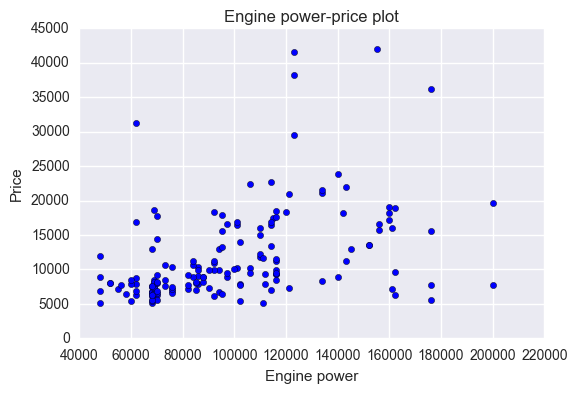

In [41]:
# Your code goes here
x_axis = auto_numeric.loc[:,'engine-power']
y_axis = auto_numeric.loc[:,'price']
plt.scatter(x_axis,y_axis)
plt.title("Engine power-price plot")
plt.xlabel("Engine power")
plt.ylabel("Price")

<font color='red'>
Good!



### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*

The engine power alone is not sufficient for prediction of the price. The correlation between the 2 variables is low and there's doesn't seem to be a relationship of statistical significance between the variables. A simple line will not be suitable.


<font color='red'>
Good!



### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

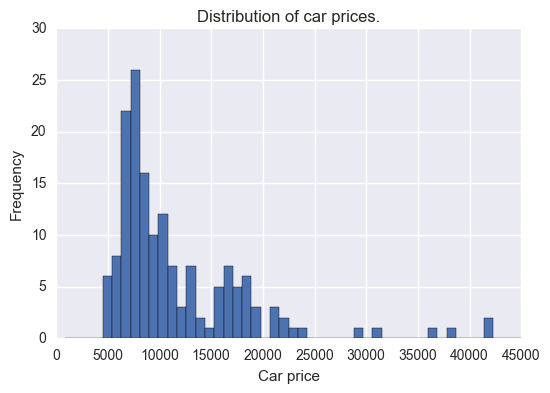

In [42]:
# Your code goes here
plt.hist(y_axis, bins = 50, range = (0,45000))
plt.title("Distribution of car prices.")
plt.xlabel("Car price")
plt.ylabel("Frequency")

<font color='red'>
Good!



### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*

I would preprocess the distribution by taking the log of the values, because systematic extreme values lower regression performance, then I would normalize around the 0.


<font color='red'>
Good!



### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [43]:
# Your code goes here
X = x_axis.values
y = y_axis.values

<font color='red'>
Good!



### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [44]:
# Your code goes here
X=np.reshape(X,(len(X),1))
X.shape# Your code goes here

(159, 1)

<font color='red'>
Good!



### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [45]:
# Your code goes here
eighty_percent = int(159*80/100)
twenty_percent = 159 - eighty_percent # Your code goes here
random_indices = np.random.choice(159, eighty_percent, replace=False)
X_train = X[random_indices,:]
y_train = y[random_indices]
X_test = []
y_test = []
for index, row in enumerate(X):
    if index in random_indices:
        continue
    else:
        X_test.append([row[0]])
        y_test.append(y[index])

<font color='red'>
Good, but you can just use the train_test_split function!



### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [46]:
# Your code goes here
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

<font color='red'>
Good!



### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [47]:
# Your code goes here
# um - code or comment?
print("After estimating the model weights:")
print("W0 + W1*engine_power = predicted_price")
print("W1 = model.coef_")
model.coef_

After estimating the model weights:
W0 + W1*engine_power = predicted_price
W1 = model.coef_


array([ 0.08366892])

<font color='red'>
Good, but you should report the W0 attribute too! (~2000).



### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*

The magnitude of the regression coefficient doesn't tell us whether a feature is important or not if we don't look at the graph (1.4). It simply represents the slope of the line of best fit, i.e. the degree to which the predictor influences the predictions, but it doesn't tell us if the predictor is suitable for the task. To measure if a predictor is good we can use the correlation coefficient, error metrics etc. An exception is the case when the correlation coefficient is 0 (the dependent variable is not influenced by the independent variable at all, but we can still fit a horizontal line then using w0 only if the y values are constant). 

If we add one more unit of engine-power, the slope(the regression coefficient) will change slightly (or not so slightly if it is an outlier).

<font color='red'>
You're first point is good!

You misunderstood the second part however - when one unit of engine power is added, the price increases on average by ~£0.09. (Not when one datapoint is added.)


### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

In [48]:
# Your code goes here
plt.scatter(X_train,y_train, color ='black')
plt.plot(X_train, model.predict(X_train),color='blue',
         linewidth=1)
plt.title("Regression line")
plt.xlabel("Engine power")
plt.ylabel("Price")

<font color='red'>
Good, but you missed plotting predicted values for the training set.


### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*

If we don't have enough data, it might not be a good idea to further make the training set even smaller by using a portion of the data for the testing set.
The proportion of the classes among the training/test splits could be different and that will likely lead to poor error estimation.

<font color='red'>
True, but the even bigger problem is that our testing set would be very small, and so likely not representative of the overall distribution of our data.

(Also, we're doing regression not classification, so no classes here!)

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [49]:
# Your code goes here
kf = KFold(159, n_folds = 5,shuffle=True, random_state=0)

<font color='red'>
Good!



### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [50]:
# Your code goes here
for train_index_lst, _ in kf:
    train_subset = y_axis[train_index_lst]
    print(np.mean(train_subset))

11853.2677165
11635.976378
11689.8740157
11709.8267717
11535.84375


<font color='red'>
Good!



### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [51]:
# Your code goes here
model_2 = LinearRegression(normalize=True)
y_predicted = cross_val_predict(model_2, X, y, kf)
y_predicted.shape


(159,)

In [52]:
print("Not related to the question")
plt.scatter(X,y, color ='black')
plt.scatter(X,y_predicted,color='blue',lw = 0.5)
plt.xlabel("Engine power")
plt.ylabel("Price")

Not related to the question


<font color='red'>
Good!



### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [53]:
# Your code goes here
r2 = r2_score(y,y_predicted)
print("Adjusted coefficient of determination between y and y_pred:", r2)
print("Root mean squared error between y and y_pred:", np.sqrt(mean_squared_error(y,y_predicted)))
print("Mean absolute error between y and y_pred: ", mean_absolute_error(y,y_predicted))
print("Correlation coefficient:", np.corrcoef(y,y_predicted)[0][1])


Adjusted coefficient of determination between y and y_pred: 0.173005270976
Root mean squared error between y and y_pred: 6114.45211862
Mean absolute error between y and y_pred:  3987.95779619
Correlation coefficient: 0.417122199043


<font color='red'>
Good!



In [54]:
print("Not related to question")
plt.scatter(y, y_predicted)

Not related to question


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*

The coefficient of determination the square of the correlation coefficient and represents how suitable a model is for making predictions. It means the percentage of the total variance of the true prices that is explained by the predicted prices. If we fit a line through the plot of true/predicted labels, we'll see that most of the points aren't close to this line which is why the coefficient of determination is small. (note - sklearn uses the adjusted coefficient of determination which can be negative)

The mean squared error is a metric that measures the error of a model, taking the differences between the predicted and true label for each instance, squaring them, then summing them and up, and then dividing them to the total number of instances.

The root mean squared error is the square root of the mean squared error.

The MAE is a metric that measures the error of a model, taking the absolute values of the differences between the predicted and true values, then summing them up and dividing them by the total number of instances.

The correlation coefficient is a metric that captures the degree to which the relative ordering of the predictions with respect to the true labels is accurate. It is insensitive to mean and scale.

The value of the CC between the predicted labels and the true labels is understandably low - we didn't manage to capture the relative ordering with respect to the true labels, because we used engine power for prediction which is not a good estimator by itself by looking at the graph in 1.4. For the same reason, the MAE and the RMSE are also high, with the value of RMSE being higher because we have a lot of values that lie far away from the lines of best fit and this result in higher error for RMSE than MAE.


<font color='red'>
Good!



### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

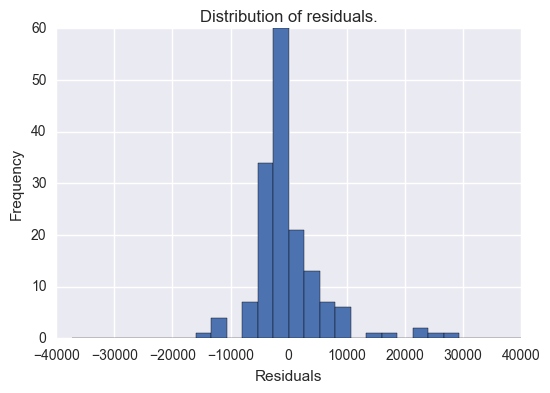

In [55]:
# Your code goes here
residuals = np.subtract(y,y_predicted)
plt.hist(residuals,bins = 30, range = (-40000,40000))
plt.title("Distribution of residuals.")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

*Your answer goes here*


The histogram looks more normally distributed than I expected, given that the model is not great. Looking at the graph I plotted on q. 1.18, it looks plausible.

<font color='red'>
Good!

(Even for poor fits our residuals should be normal - this is one of the assuptions linear regression is based on!)

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [56]:
# Your code goes here
data_path_auto_base = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path_auto_base, delimiter = ',')
X_base = np.reshape(auto_base.loc[:,'engine-power'].values,(len(auto_base.loc[:,'engine-power'].values),1))
y_base = auto_base.loc[:,'price'].values
model_3 = LinearRegression(normalize=True)
y_base_predicted = cross_val_predict(model_3,X_base, y_base, kf)
r2_base = r2_score(y_base,y_base_predicted)
print("Adjusted coefficient of determination between y and y_pred:", r2_base)
print("Root mean squared error between y and y_pred:", np.sqrt(mean_squared_error(y_base,y_base_predicted)))
print("Mean absolute error between y and y_pred: ", mean_absolute_error(y_base,y_base_predicted))
print("Correlation coefficient:", np.corrcoef(y_base,y_base_predicted)[0][1])

Adjusted coefficient of determination between y and y_pred: -0.00213595381121
Root mean squared error between y and y_pred: 6730.84360395
Mean absolute error between y and y_pred:  4901.86096203
Correlation coefficient: -0.0619144160589


<font color='red'>
Good!



### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

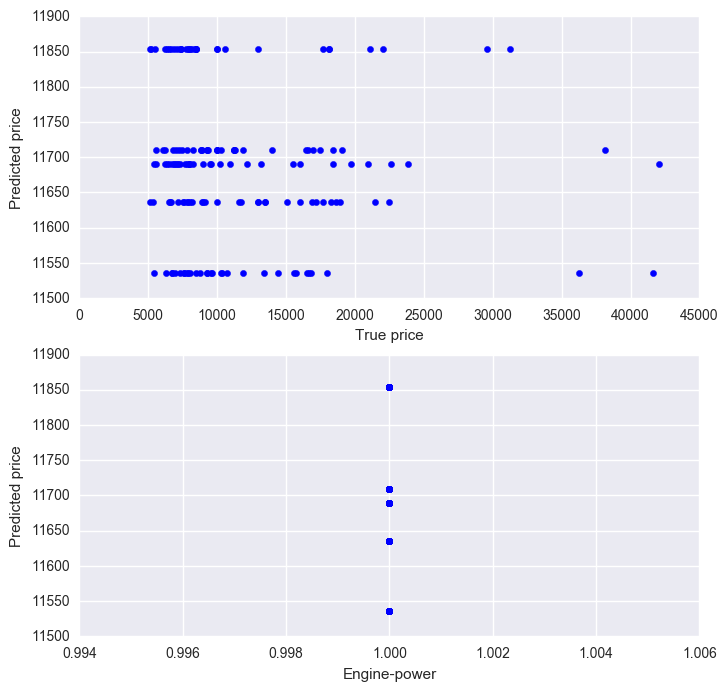

In [57]:
# Your code goes here
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel("True price")
ax1.set_ylabel("Predicted price")
ax2 = fig.add_subplot(212)
ax1.scatter(y_base, y_base_predicted,color='blue')
ax2.scatter(X_base, y_base_predicted,color='blue')
ax2.set_xlabel("Engine-power")
ax2.set_ylabel("Predicted price")


<font color='red'>
Good!



### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*

The simplest baseline model, since we have only 1 value for engine power, if we use 100% of the set as training data, is to classify each new point as either the expected value or the mode of the prices of the training set (althought it is probably better to draw from a normal distribution with mean the mean of the true prices and variance the variance of the true prices, but it is not simpler).

Looking at the second graph of 1.23 I see that the cross validation procedure can be justified because we have 5 classifiers in the cross-validation procedure and each one of them takes the expected value(disregarding input features) of the corresponding training set as a baseline for future predictions.

<font color='red'>
Good!

(Note that always predicting the mean is generally better than sampling from a distibution, for the same reason that the best baseline classifier is just always predicting the most common class.)

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [58]:
# Your code goes here
# TODO
auto_base.describe()

engine-power         price
count         159.0    159.000000
mean            1.0  11684.723270
std             0.0   6744.910579
min             1.0   5118.000000
25%             1.0   7372.000000
50%             1.0   9233.000000
75%             1.0  14719.500000
max             1.0  42056.000000

*Your answer goes here*

Because we don't use any other other information other than the engine price. We compute the mean and use it as future predictions and this is bad, because in this case the data has a large range from 5118.000000 to 	42056.000000 and also has large standard deviation of 6744.910579, so the Gaussian probability density function is wide and there aren't that many points close to the mean.

<font color='red'>
Good!



## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function useful for this question.*

In [ ]:
print("THIS CODE IS JUST TO NOT LOSE MARKS - USE THE NEXT CELL FOR A BETTER SOLUTION")
g=sns.pairplot(auto_numeric,x_vars = ['price'],size = 5,y_vars=['normalized-losses','wheel-base','length','width','height','engine-size','bore','stroke','compression-ratio','engine-power','peak-rpm','city-mpg','highway-mpg','mean-effective-pressure','torque'])

THIS CODE USES ITERTOOLS AND SCIPY - PLEASE INSTALL THEM OR IF YOU CAN'T USE THE PREVIOUS CELL
WARNING - THE GRAPHS WILL DISPLAY ONLY ON THE GOOGLE CHROME BROWSER - OPEN THE NOTEBOOK IN CHROME
Please wait a bit...
This will yield every 2d plot we could need and all correlations and p-values between the variables.
Correlations will appear first in decreasing sorted absolute value order
First figures will have price as y axis
Loading...

Yield the correlation and p-value between price and the rest of the variables: 

( engine-size - price ) - correlation : 0.715124590191 , p-value : 0.000000000000000000000000033804
( width - price ) - correlation : 0.524325552127 , p-value : 0.000000000001309754063708769642
( length - price ) - correlation : 0.512883045265 , p-value : 0.000000000004784816328901353841
( engine-power - price ) - correlation : 0.443968591463 , p-value : 0.000000004581721042085925188739
( highway-mpg - price ) - correlation : -0.438467431714 , p-value : 0.0000000074411110934

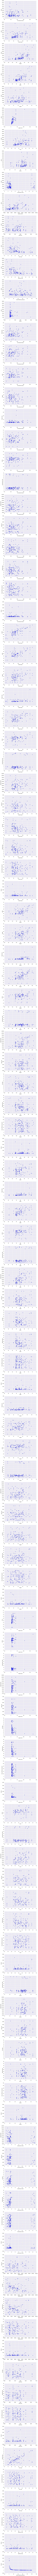

In [59]:
print("THIS CODE USES ITERTOOLS AND SCIPY - PLEASE INSTALL THEM OR IF YOU CAN'T USE THE PREVIOUS CELL")
print("WARNING - THE GRAPHS WILL DISPLAY ONLY ON THE GOOGLE CHROME BROWSER - OPEN THE NOTEBOOK IN CHROME")
print("Please wait a bit...")
print("This will yield every 2d plot we could need and all correlations and p-values between the variables.")
print("Correlations will appear first in decreasing sorted absolute value order")
print("First figures will have price as y axis")
print("Loading...")
print("")
import itertools, scipy
list_categories = ['normalized-losses','wheel-base','length','width','height','engine-size','bore','stroke','compression-ratio','engine-power','peak-rpm','city-mpg','highway-mpg','mean-effective-pressure','torque','price']
combinations_no_repl = list(itertools.combinations(list_categories,2))
combinations_price_first = []
corr_scipy = []

# This below will put the graphs for price first, kinda slow but whatever

for combo in combinations_no_repl:
    if combo[1] == 'price':
        combinations_price_first.append(combo)
for com in combinations_no_repl:
    if com[1] != 'price':
         combinations_price_first.append(com)
num_combos = len(combinations_price_first)
axes = []
huge_figure = plt.figure(figsize=(8,650))
for i in range(num_combos):
    axes.append(huge_figure.add_subplot(num_combos,1,i+1))
    x_axis_name = combinations_price_first[i][0]
    y_axis_name = combinations_price_first[i][1]
    axes[i].set_xlabel(x_axis_name)
    axes[i].set_ylabel(y_axis_name)
    x_values_combinations = auto_numeric.loc[:,combinations_price_first[i][0]].values
    y_values_combinations = auto_numeric.loc[:,combinations_price_first[i][1]].values
    axes[i].scatter(x_values_combinations, y_values_combinations,color='blue')
    corr_x_y_sci = scipy.stats.pearsonr(x_values_combinations,y_values_combinations)
    corr_scipy.append((x_axis_name,y_axis_name,corr_x_y_sci))
    

corr_scipy.sort(key=lambda x:np.abs(x[2][0]),reverse = True)

print("Yield the correlation and p-value between price and the rest of the variables: ")
print("")
for c in corr_scipy:
    if c[1] == 'price':
        print("(",c[0],"-",c[1],")","-","correlation :",c[2][0],",","p-value :",format(c[2][1],'.30f'))
        
print("")
print("Yield the rest of the correlations: ")
print("")

for c in corr_scipy:
    if c[1] != 'price':
        print("(",c[0],"-",c[1],")","-","correlation :",c[2][0],",","p-value :",format(c[2][1],'.30f'))
    
#huge_figure.savefig('figure.pdf')

*Your answer goes here*

The engine size seems like the best option for predicting the price, both from the correlation value and from the examination of the figure. The width and length can also be used. Some of the variables appear useless for predicting the price such as the height, stroke, compression-ratio, mean-effective-pressure, torque, peak-rpm and normalized-losses. Some of the attributes exhibit significant correlations between each other such as the wheel-base and length, and the city-mpg and the highway-mpg.

I think I can safely remove the attributes whose p-value with the price is larger than 0.05 (e.g. normalized-losses, peak-rpm, torque, mean-effective-pressure) . They don't exhibit statistical significance.

<font color='red'>
Great!


### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [60]:
# Your code goes here
X_auto_num = auto_numeric.drop(['price'],axis=1)
X_auto_num_mat = X_auto_num.as_matrix()
kf_3 = KFold(159, n_folds = 5,shuffle=True, random_state=0)
MultLinReg = LinearRegression(normalize=True)
predictions = cross_val_predict(MultLinReg,X_auto_num_mat,y,kf_3)


<font color='red'>
Good!



### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [61]:
# Your code goes here
print("Root mean squared error between y and y_pred:", np.sqrt(mean_squared_error(y,predictions)))
print("Mean absolute error between y and y_pred: ", mean_absolute_error(y,predictions))
print("Correlation coefficient:", np.corrcoef(y,predictions)[0][1])

Root mean squared error between y and y_pred: 4819.80464283
Mean absolute error between y and y_pred:  3050.34459963
Correlation coefficient: 0.742560270537


In [62]:
plt.scatter(y,predictions)


<font color='red'>
Good!



### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*

The metrics for the Multivariate Regressor show a better performance overall than the Simple Linear Regressor.
Both error metrics indicate that and the CC shows that we have captured the ordering of the variable values better.

<font color='red'>
Good!



### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

In [63]:
# Your code goes here
engine_size = auto_numeric.loc[:,'engine-size']
plt.hist(engine_size, bins = 50,range = (-50,250))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  89.,  31.,
         19.,   3.,   4.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ -50.,  -44.,  -38.,  -32.,  -26.,  -20.,  -14.,   -8.,   -2.,
           4.,   10.,   16.,   22.,   28.,   34.,   40.,   46.,   52.,
          58.,   64.,   70.,   76.,   82.,   88.,   94.,  100.,  106.,
         112.,  118.,  124.,  130.,  136.,  142.,  148.,  154.,  160.,
         166.,  172.,  178.,  184.,  190.,  196.,  202.,  208.,  214.,
         220.,  226.,  232.,  238.,  244.,  250.]),
 <a list of 50 Patch objects>)

<font color='red'>
Good!



### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*

Yes, we have some points that look like outliers(they're not), extreme values cause problems with regression - we can use log and then normalization to fix this problem.

<font color='red'>
Good!



### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

(array([  0.,   0.,   0.,   0.,   1.,   1.,  57.,  31.,  29.,  17.,   7.,
          4.,  10.,   0.,   0.,   1.,   0.,   1.,   0.,   0.]),
 array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
         1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 20 Patch objects>)

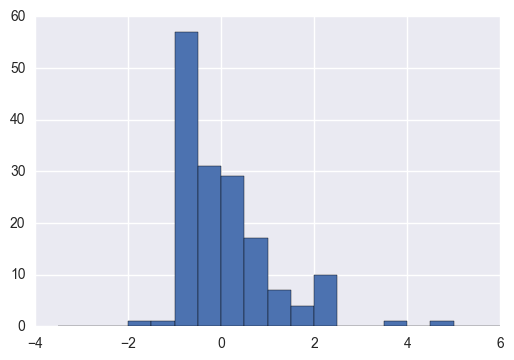

In [64]:
# Your code goes here
engine_size_norm = np.log(engine_size)
mean_array = engine_size_norm.mean()
std_array = engine_size_norm.std()
for index_norm,_ in enumerate(engine_size_norm):
    engine_size_norm[index_norm] = (engine_size_norm[index_norm]-mean_array)/std_array
plt.hist(engine_size_norm,bins=20, range = (-4,6))

<font color='red'>
Good!



### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [65]:
# Your code goes here
X_auto_num['engine-size'] = engine_size_norm
X_auto_num_mat = X_auto_num.as_matrix()
kf_4 = KFold(159, n_folds = 5,shuffle=True, random_state=0)
MultLinReg2 = LinearRegression(normalize=True)
predictions_2 = cross_val_predict(MultLinReg2,X_auto_num_mat,y,kf_4)
r2_base_2 = r2_score(y,predictions_2)
print("By using cross-validation again:")
print("Adjusted coefficient of determination between y and predictions_2:", r2_base_2)
print("Root mean squared error between y and predictions_2:", np.sqrt(mean_squared_error(y,predictions_2)))
print("Mean absolute error between y and predictions_2: ", mean_absolute_error(y,predictions_2))
print("Correlation coefficient:", np.corrcoef(y,predictions_2)[0][1])

By using cross-validation again:
Adjusted coefficient of determination between y and predictions_2: 0.689612268029
Root mean squared error between y and predictions_2: 3745.91959756
Mean absolute error between y and predictions_2:  2668.36429567
Correlation coefficient: 0.831675321658


<font color='red'>
Good!



### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*

The performance is better. Every metric exhibits better results, we've captured the ordering of the variables, and we've accounted for the variance of the data.


<font color='red'>
You should explain *why* these values have improved too - the transformation has weakened the distorting effect of the more extreme values in our dataset on the regression line, by greatly reducing the range of values that the 'engine-size' variable can assume.


### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [66]:
pd.set_option('max_columns', 30)

In [67]:
# Your code goes here
data_path_n = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path_n, delimiter = ',')
print(auto_full.shape)


(159, 27)


<font color='red'>
Good, but not showing the first 20 instances!


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*

Categorical values - make, fuel-type, aspiration, num-of-doors(could be ordinal), body-style, drive-wheels, engine-location, engine-type, num-of-cylinders(could be ordinal), fuel-system, symboling(could be ordinal).

<font color='red'>
Good, but you don't answer the second part of the question.



### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [68]:
# Your code goes here

auto_full_edit=auto_full.copy(deep=True)

for col in auto_full_edit:
    if col in ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'symboling']:
        lee = LabelEncoder().fit(auto_full[col])
        auto_full_edit[col]=lee.transform(auto_full[col])

ohe = OneHotEncoder()
ohe.fit(auto_full_edit[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'symboling']])
X_enc=ohe.transform(auto_full_edit[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'symboling']])

X_enc = X_enc.toarray()


<font color='red'>
Good!



### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [69]:
# Your code goes here
np.set_printoptions(threshold='nan')
np.set_printoptions(suppress=True)
X_auto_full_arr = auto_full_edit.as_matrix()
X_auto_full_arr = np.asarray(X_auto_full_arr[:,[0,8,9,10,11,14,16,17,18,19,20,21,22,24,25,26]])
X_auto_full_transformed = np.concatenate((X_auto_full_arr,X_enc), axis=1)
model_transformed_data = LinearRegression(normalize=True)
y_auto_full = auto_full_edit.loc[:,'price'].values
kf_5 = KFold(159, n_folds = 5,shuffle=True, random_state=0)
predictions_transf_data = cross_val_predict(model_transformed_data,X_auto_full_transformed,y_auto_full,kf_5)
r2_auto_full = r2_score(y_auto_full,predictions_transf_data)

print("Adjusted coefficient of determination between y and predictions_2:", r2_auto_full)
print("Root mean squared error between y and predictions_2:", np.sqrt(mean_squared_error(y_auto_full,predictions_transf_data)))
print("Mean absolute error between y and predictions_2: ", mean_absolute_error(y_auto_full,predictions_transf_data))
print("Correlation coefficient:", np.corrcoef(y_auto_full,predictions_transf_data)[0][1])

Adjusted coefficient of determination between y and predictions_2: 0.999998998194
Root mean squared error between y and predictions_2: 6.72973687352
Mean absolute error between y and predictions_2:  0.88460841535
Correlation coefficient: 0.999999520662


<font color='red'>

Suspiciously good results! Looks like you haven't dropped the target 'price' attribute from your new X_enc dataset.


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*

An advantage of this model is that we can use categorical data to help with classifications. A disadvantage is that judging by the statistics it is probably overfitting the training data.


<font color='red'>
Good, although you should have spotted that your results above were unrealistic!


### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

In [70]:
# Your code goes here

print("I'm assuming this question wants to compare the result for the transformed auto-numeric set with decision trees, forrests and the model built in q.2.8, i.e. I use the auto-numeric data set. If we have to transform the auto-full data set we can use the same technique.")
print("")
dec_tree = DecisionTreeRegressor()
random_f = RandomForestRegressor()

kf_9 = KFold(159, n_folds = 5,shuffle=True, random_state=0)
kf_10 = KFold(159, n_folds = 5,shuffle=True, random_state=0)

predictions_dec_tree = cross_val_predict(dec_tree,X_auto_num_mat,y,kf_9)
r2_base_dt = r2_score(y,predictions_dec_tree)

predictions_rand_forrest = cross_val_predict(random_f,X_auto_num_mat,y,kf_10)
r2_base_forr = r2_score(y,predictions_rand_forrest)

print("By using cross-validation again on auto-numeric:")
print("")
print("Decision tree regressor:")
print("Adjusted coefficient of determination between y and predictions_dec_tree:", r2_base_dt)
print("Root mean squared error between y and predictions_dec_tree:", np.sqrt(mean_squared_error(y,predictions_dec_tree)))
print("Mean absolute error between y and predictions_dec_tree: ", mean_absolute_error(y,predictions_dec_tree))
print("Correlation coefficient:", np.corrcoef(y,predictions_dec_tree)[0][1])
print("")
print("Random forrest regressor:")
print("Adjusted coefficient of determination between y and predictions_rand_forrest:", r2_base_forr)
print("Root mean squared error between y and predictions_rand_forrest:", np.sqrt(mean_squared_error(y,predictions_rand_forrest)))
print("Mean absolute error between y and predictions_rand_forrest: ", mean_absolute_error(y,predictions_rand_forrest))
print("Correlation coefficient:", np.corrcoef(y,predictions_rand_forrest)[0][1])


I'm assuming this question wants to compare the result for the transformed auto-numeric set with decision trees, forrests and the model built in q.2.8, i.e. I use the auto-numeric data set. If we have to transform the auto-full data set we can use the same technique.

By using cross-validation again on auto-numeric:

Decision tree regressor:
Adjusted coefficient of determination between y and predictions_dec_tree: 0.665074922109
Root mean squared error between y and predictions_dec_tree: 3891.16826405
Mean absolute error between y and predictions_dec_tree:  2636.93710692
Correlation coefficient: 0.834234983057

Random forrest regressor:
Adjusted coefficient of determination between y and predictions_rand_forrest: 0.813299514175
Root mean squared error between y and predictions_rand_forrest: 2905.21917361
Mean absolute error between y and predictions_rand_forrest:  2066.80062893
Correlation coefficient: 0.901910021112


*Your answer goes here*

On a couple runs, the random forrest performs better than the decision tree regressor and the multivariate regressor and the multivariate regressor performs better than the decision tree regressor.





<font color='red'>
Good, although would be improved with commentary on why you think this regressor does  worse than linear regression.
